In [1]:
#yapay nöron ==>> perceptron

In [2]:
#input1 + input2 +bias -> output

## activation functions 

In [3]:
 ## sigmoid fonksiyon genelde sınıflandırmalarda kullanılır. 0-1 arasında değer alır
    ## sonucunda --> 0.80 ihtimalle bu fotoğraf kedidir gibi bir veri döndürür

In [4]:
## tanh fonksiyonu genelde sınıflandırma için kullanılır, -1 ile 1 arasında değer alır


In [5]:
## reLU 0 ile sonsuz arasında değer alır.
# derin öğrenmede sık kullanılır

In [6]:
## linear fonksiyonlar
## nonlinear olmaması sebebiyle modellerde sorunlara yol açabilir. 
#f(x) = X 

## Regression Nedir ?? 

In [7]:
#toplam veri setindeki ortalamaya yakın olma eğilimi 

In [8]:
#cost funct. -> gerçek veriden ne kadar uzaktayız onu söyler

In [9]:
#dradient descent -> bir fonksiyonunun minimumunu bulmak için kullandığımız optimizasyon fonksyionu 
# maliyet fonksiyonunu minimize etmek için kullanabiliriz

In [10]:
#eğriden aşağı doğru inişte, aldığımız her noktanın eğimi, aslında learning rate'tir
# minimumu bulmaya çalışırken, çok fazla nokta için yapacak olursak, çok zaman alır, 
# step sayısı az olursa, minimumu kaçırabilir. o yüzden, bunu da optimize etmemiz gerekebilir

In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [13]:
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [14]:
!pip install tensorflow

In [15]:
import seaborn as sbn

In [16]:
import matplotlib.pyplot as plt

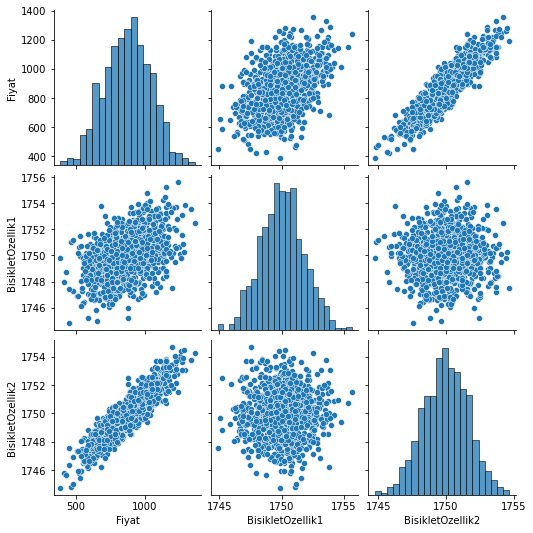

In [17]:
sbn.pairplot(df)

## veriyi test-train olarak ikiye bölme

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [20]:
df # fiyat -> y 

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [21]:
y = df["Fiyat"].values #fiyat verilerini array e dönüştürdük

In [22]:
x = df[["BisikletOzellik1","BisikletOzellik2"]].values

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 15)

In [24]:
x_train.shape #shape bit attribute, method olmadığı için sonuna parantez koyulmaz

(670, 2)

In [25]:
# scaling -> boyut değişikliği. 

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(x_train)

MinMaxScaler()

In [29]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [31]:
import tensorflow as tf

In [32]:
# sequantial => hangi katmanlarla çalışacağımızı belirtiyoruz

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## model oluşturma 

In [35]:
model = Sequential() # model oluşturuldu

In [38]:
model.add(Dense(4,activation = "relu")) #5 tane nöron olacak, activasyon fonk relu olacak 

In [39]:
#kaç katman olacaksa, o kadar satır model.add yapılır

In [40]:
model.add(Dense(4,activation = "relu"))
model.add(Dense(4,activation = "relu"))
model.add(Dense(4,activation = "relu"))

In [41]:
model.add(Dense(1)) #output norönu 1 tane verilir. 

In [42]:
model.compile(optimizer="rmsprop",loss="mse") #mse ->mean squared error tells how you close regression line is to a set of points

In [43]:
#batch -> büyük veri setinde, aynı anda veriyi modele vermek sıkıntı yaratacağından bölerek verilir

## oluşturulan modelde eğitme

In [44]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 2s 2ms/step - loss: 795868.0000
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795742.6875
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 795617.1250
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 795475.1250
Epoch 5/250
21/21 [==============================] - 0s 3ms/step - loss: 795306.8125
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 795110.8750
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 794883.3125
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 794617.3125
Epoch 9/250
21/21 [==============================] - 0s 3ms/step - loss: 794295.5625
Epoch 10/250
21/21 [==============================] - 0s 3ms/step - loss: 793885.7500
Epoch 11/250
21/21 [==============================] - 0s 3ms/step - loss: 793376.1250
Epoch 12/250
21/21 [==============================] - 0s 3ms/st

21/21 [==============================] - 0s 3ms/step - loss: 79.0659
Epoch 196/250
21/21 [==============================] - 0s 3ms/step - loss: 78.9344
Epoch 197/250
21/21 [==============================] - 0s 3ms/step - loss: 78.8743
Epoch 198/250
21/21 [==============================] - 0s 3ms/step - loss: 79.9313
Epoch 199/250
21/21 [==============================] - 0s 3ms/step - loss: 78.8202
Epoch 200/250
21/21 [==============================] - 0s 3ms/step - loss: 81.2267
Epoch 201/250
21/21 [==============================] - 0s 3ms/step - loss: 74.0885
Epoch 202/250
21/21 [==============================] - 0s 2ms/step - loss: 82.3765
Epoch 203/250
21/21 [==============================] - 0s 3ms/step - loss: 81.8092
Epoch 204/250
21/21 [==============================] - 0s 3ms/step - loss: 78.9516
Epoch 205/250
21/21 [==============================] - 0s 3ms/step - loss: 76.1993
Epoch 206/250
21/21 [==============================] - 0s 3ms/step - loss: 82.7348
Epoch 207/250
21/2

In [48]:
loss = model.history.history["loss"] ## loss azaldıkça, doğruluk artar, o yüzden azalmasını bekleriz

<AxesSubplot:>

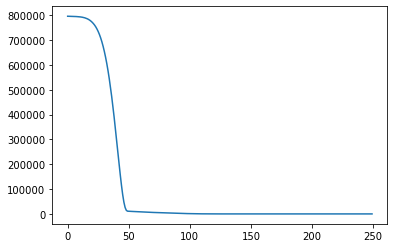

In [49]:
sbn.lineplot(x=range(len(loss)),y = loss)

In [55]:
trainLoss = model.evaluate(x_train,y_train,verbose = 0)
trainLoss

75.40058135986328

In [56]:
testLoss = model.evaluate(x_test,y_test,verbose=0)
testLoss

83.96971130371094

## test tahminleri 

In [57]:
testTahmin = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [59]:
testTahmin

array([[1076.0176 ],
       [ 622.5019 ],
       [ 874.5291 ],
       [ 892.64056],
       [ 897.89856],
       [ 450.4079 ],
       [ 929.5062 ],
       [ 989.73987],
       [ 939.5438 ],
       [1015.06006],
       [ 749.4829 ],
       [ 916.2372 ],
       [ 945.86163],
       [1052.9407 ],
       [1119.6223 ],
       [ 680.1928 ],
       [1125.157  ],
       [ 649.60474],
       [1152.7568 ],
       [ 884.9494 ],
       [ 891.2216 ],
       [ 715.35547],
       [ 455.7027 ],
       [ 610.73395],
       [ 833.46124],
       [1089.4094 ],
       [ 712.37244],
       [ 755.43634],
       [ 871.90643],
       [ 769.15546],
       [ 450.14423],
       [ 781.5703 ],
       [ 726.8598 ],
       [ 645.4754 ],
       [ 885.14484],
       [ 842.25824],
       [1033.9949 ],
       [1021.092  ],
       [ 843.37885],
       [ 860.66266],
       [ 755.68567],
       [1172.7205 ],
       [1095.8153 ],
       [1086.0305 ],
       [ 871.5797 ],
       [ 595.3306 ],
       [1143.9272 ],
       [ 971.

In [60]:
tahminDF = pd.DataFrame(y_test,columns = ["Gerçek Y"])

In [61]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [62]:
# test tahminleri array halinde, dfyle birleştirmek için series e dönüştürmemiz gerek

In [64]:
testTahmin = pd.Series(testTahmin.reshape(330,))

In [65]:
testTahmin

0      1076.017578
1       622.501892
2       874.529114
3       892.640564
4       897.898560
          ...     
325    1011.841187
326     789.330566
327     764.492798
328    1165.720337
329     801.261536
Length: 330, dtype: float32

In [66]:
df = pd.concat([tahminDF,testTahmin],axis = 1)

In [67]:
df

,Gerçek Y,0
0,1081.652164,1076.017578
1,622.675990,622.501892
2,889.356810,874.529114
3,902.826733,892.640564
4,897.662404,897.898560
...,...,...
325,1028.438035,1011.841187
326,789.934950,789.330566
327,758.490486,764.492798
328,1172.871659,1165.720337


In [70]:
df.columns = ["Asıl Y","Tahmin Y"]

In [71]:
df

,Asıl Y,Tahmin Y
0,1081.652164,1076.017578
1,622.675990,622.501892
2,889.356810,874.529114
3,902.826733,892.640564
4,897.662404,897.898560
...,...,...
325,1028.438035,1011.841187
326,789.934950,789.330566
327,758.490486,764.492798
328,1172.871659,1165.720337


<AxesSubplot:xlabel='Asıl Y', ylabel='Tahmin Y'>

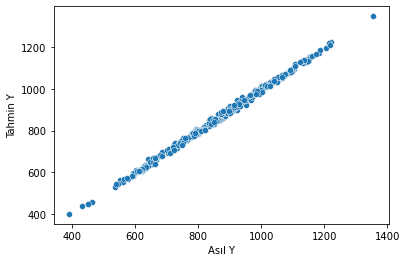

In [72]:
sbn.scatterplot(x = "Asıl Y" , y="Tahmin Y", data = df)

In [73]:
# hataların absolute değerini aldıımızda, sapma için bir öngörü yapılabilir

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
mean_absolute_error(df["Asıl Y"],df["Tahmin Y"])

7.353782859449572

In [76]:
#ortalaması 870 lira olan fiyatlarda, 7 lira sapma önemsiz görülebilir

In [77]:
yeniBisOzellik = [[1760,1758]]

In [78]:
yeniBisOz = scaler.transform(yeniBisOzellik)

In [79]:
model.predict(yeniBisOz)

1/1 [==============================] - 0s 21ms/step


array([[1981.0586]], dtype=float32)

In [80]:
# model kaydetme

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save("bisiklet_modeli.h5")

In [83]:
modelCagir = load_model("bisiklet_modeli.h5")

In [84]:
# modeller h5 ile kaydedilir